# Lab 5. Fuzzy Systems
# Task 5.2 Project Risk Assessment
## Problem Descriptions

Implement a fuzzy system for the project risk assesment based on below rules.

Below are the rules which needs to in controller:--

    IF project funding is adequate
    OR project staffing is small
    THEN risk is low

    IF project funding is marginal
    AND project staffing is large
    THEN risk is normal

    IF project funding is inadequate
    THEN risk is high

Below are the fuzzy sets which are included in controller:--

    x(inadequate) = {1/0 , 1/30  , 0/45}
    x(marginal) = {0/30 , 1/50, 0/70}
    x(adequate) = {0/55 , 1/70 , 1/100}

    y(small) = {1/0 , 1/25 , 0/65}
    y(large) = {0/35 ,1/75 , 1/100 }

    z(low) = {1/0 , 1/20 , 0/40}
    z(normal) = {0/25 , 1/45 , 1/55 , 0/75}
    z(high) = {0/60 , 1/80 , 1/100}

    

## Implementation and Results

#implementation
To implement a fuzzy system, first we identify the linguistic variables and  its values.

      

    *   project funding(x):- inadequate(A1),marginal(A2),adequate(A3)
    *   project staffing(y):- small(B1), large(B2)
    *   risk(x):- low(C1),Normal(C2),High(C3)

rules can be written with values as follows:--

    IF x is A3
    OR y is B3
    THEN z is C3

    IF x is A2
    AND y is B2
    THEN z is C2

    IF x is A1
    THEN z is C3

our engine will have two inputs and one output.
this means two antecedents and one consequence.

so based on fuzzy sets, we will give range to our linguistic variables.

    *   project funding(x):[0,100]
    *   project staffing(y):[0,100]
    *   risk(x):[0,100]

using code we give this range using the below function.

    ctrl.Antecedent(np.arange(start, end, 1), antecedent)

next step is to define the membership function. values to which is taken from fuzzy set given in question(above).
 
 then there is rule creation and creating a simulation.

last step is to pass the antecendents and get the consequence.

# Code

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8dd54d1a9d9bd7341effcc13753b41eba576e3a7daece9ada90196781d6a84be
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

funding.view()
staffing.view()
risk.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])


# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
# ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


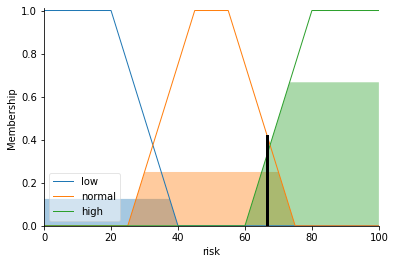

In [ ]:
# Pass inputs to the ControlSystem 
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)


In [ ]:
#adding new rule
rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


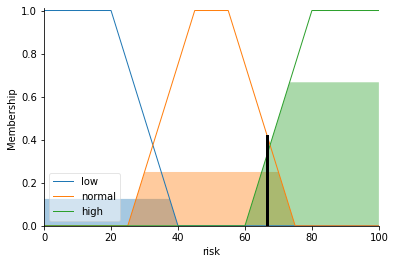

In [ ]:
ctrl_sim.inputs({'funding': 35, 'staffing': 60})


ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)

## Discussions

our aim is to get risk ,if project staffing and project funding is 60% and 35% respectively. 

*  The engine which we have crated here using the line below line, gives us output as 66.6%. So the risk id 66.6%.

    ctrl.ControlSystemSimulation(ctrl_sys)

*   This engine evaluates input , which is project funding and project staffing , against the rule supplied to it in earlier phase.
*   The centre of gravity of the coloured part of graph repersents our solution.
------------------------------------------------

  * after introduction of new rule:--

    * output is same as earlier even after introduction of new rule.

    * in mamdani inferense we find the centroid of region of intrest. Below image explaind mamdani inferense briefly.






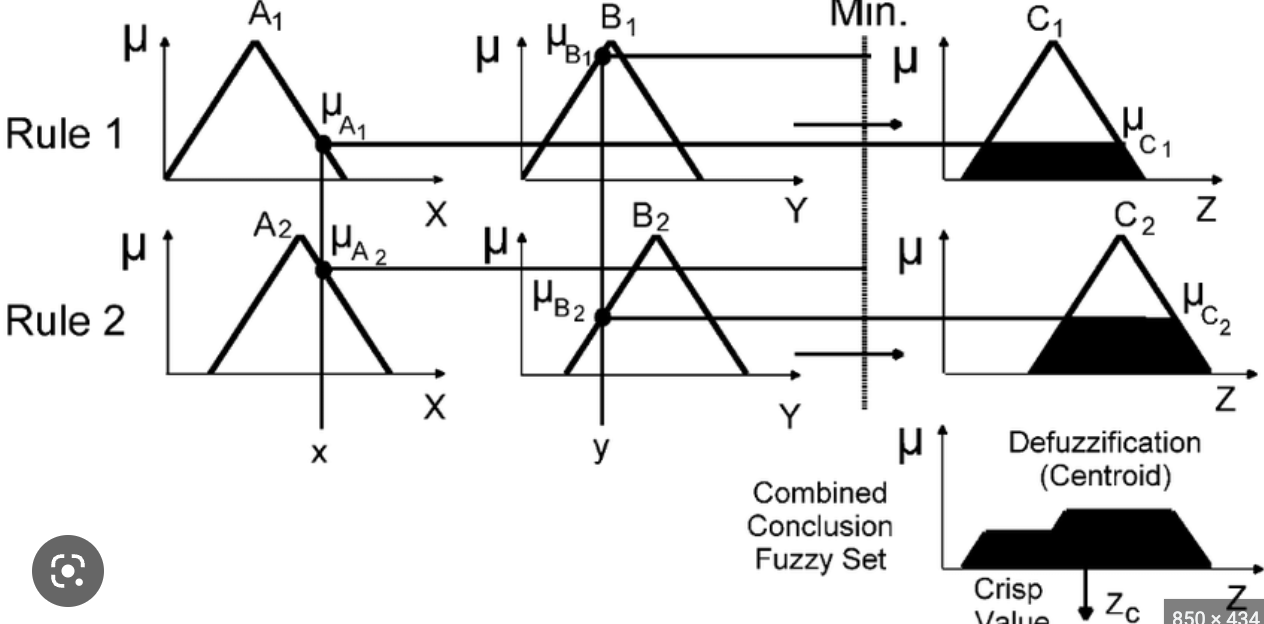